<a href="https://colab.research.google.com/github/pedroblossbraga/Convolutional-Neural-Nets/blob/master/MNIST_ConvNets_PedroB_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from __future__ import print_function
from keras.datasets import mnist
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

Exibindo alguns dígitos...

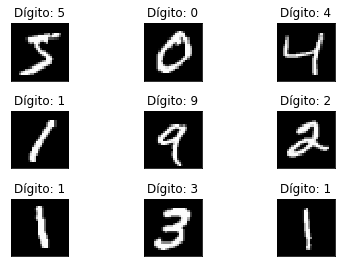

In [0]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('Dígito: {}'.format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
# dimensoes dos dados de input
img_rows, img_cols = 28, 28

### Preparação dos dados

Preparando os dados, com alteração de tamanhos, normalização de valores de pixel, etc.

In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape: ', X_train.shape)
print(X_train.shape[0], ' amostras de treino')
print(X_test.shape[0], ' amostras de teste')

X_train shape:  (60000, 28, 28, 1)
60000  amostras de treino
10000  amostras de teste


Conversão dos vetores de classe para matrizes de classes binárias

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Construção do modelo


É necessário definir:

- função de otimização

- função de perda

- métrica de performance

- gráficos de performance (checar se houve overfitting)

O modelo terá duas camadas de convolução, uma de pooling, uma totalmente conectada e uma camada de softmax.


A criação do modelo se deu pelo estudo dos modelos de François Chollet.

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
history = model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.2610 - accuracy: 0.9194 - val_loss: 0.0630 - val_accuracy: 0.9807
Epoch 2/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0859 - accuracy: 0.9742 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 3/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0643 - accuracy: 0.9802 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 4/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 5/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 6/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0293 - val_accuracy: 0.9912
Epoch 7/12
60000/60000 [==============================] - 132s

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: ', score[0]*100, '%')
print('Test accuracy: ', score[1]*100, '%')

Test loss:  3.119254826845763 %
Test accuracy:  99.05999898910522 %


In [0]:
history.history

{'accuracy': [0.91941667,
  0.97421664,
  0.9802333,
  0.9838833,
  0.98588336,
  0.98786664,
  0.9889333,
  0.9902,
  0.9906,
  0.9912,
  0.9914,
  0.992],
 'loss': [0.26095864940087,
  0.08594261697133382,
  0.06430451882183552,
  0.05241863372425238,
  0.04702017349302769,
  0.04050962066948414,
  0.03731294538428386,
  0.03236234627837936,
  0.031967191125204165,
  0.028582781280949713,
  0.027539313942193985,
  0.027059183792149027],
 'val_accuracy': [0.9807000160217285,
  0.98580002784729,
  0.9876999855041504,
  0.989300012588501,
  0.989799976348877,
  0.9911999702453613,
  0.9915000200271606,
  0.991100013256073,
  0.9915000200271606,
  0.9914000034332275,
  0.9911999702453613,
  0.9905999898910522],
 'val_loss': [0.06295195191949605,
  0.04148939852714539,
  0.0361969499932602,
  0.03396295747086406,
  0.030438886093068867,
  0.029269278832781128,
  0.028638550310058054,
  0.02966319086373842,
  0.028550899161511916,
  0.02729484976984968,
  0.02881345860886504,
  0.031192549

## Análise de Acurácia

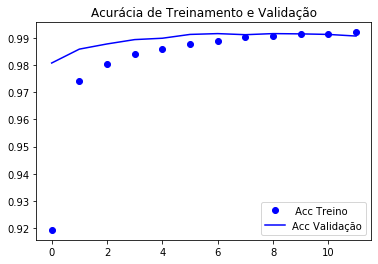

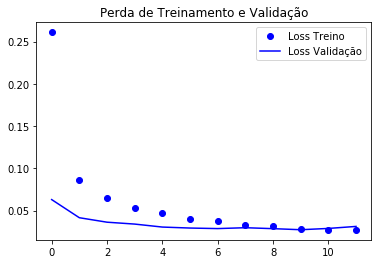

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epocas = range(len(acc))

plt.plot(epocas, acc, 'bo', label=' Acc Treino')
plt.plot(epocas, val_acc, 'b', label='Acc Validação')
plt.title('Acurácia de Treinamento e Validação')
plt.legend()

plt.figure()

plt.plot(epocas, loss, 'bo', label='Loss Treino')
plt.plot(epocas, val_loss, 'b', label='Loss Validação')
plt.title('Perda de Treinamento e Validação')
plt.legend()

plt.show()

Aparentemente não houve overfitting, que seria o caso de a acurácia de treinamento aumentar (em taxa de variação) mais do que a acurácia de validação, por conta de tamanho amostral pequeno demais para aprendizado efetivo.

Caso houvesse overfitting, poderia aplicar alguma de diversas técnicas. 
Um exemplo que achei bastante interessante é a de "data augmentation", usado por François Chollet para uma rede convolucional classificadora de imagens de gatos e cães (dataset do kaggle). Nesta técnica, são aplicadas transformações sobre os tensores de imagem, com "ImageDataGenerator", como rotação, zoom, etc, apresentando imagens aparentemente novas para o modelo, que em realidade são oriundas de imagens do dataset original, alimentando o modelo com mais dados.

In [0]:
#Salvando modelo
model.save('reconhecimento_de_digitos_MNIST.h5')

Agora tentarei expor algumas das previsões de classificação de dígitos.

9


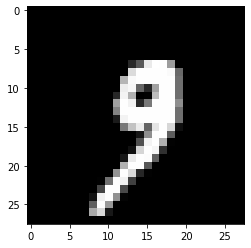

In [0]:
plt.imshow(X_test[1000].reshape(28, 28), cmap='gray')
previsao = model.predict([X_test])
print(np.argmax(previsao[1000]))

In [0]:
def show_prediction(i):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    previsao = model.predict([X_test])
    print(np.argmax(previsao[i]))

In [0]:
len(X_test)

10000

9


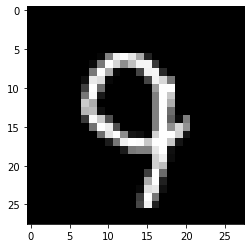

In [0]:
show_prediction(999)

3


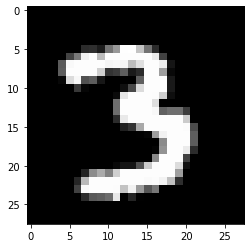

In [0]:
show_prediction(500)

## Alguns Conceitos

### Operação de Convolução

![image.png](attachment:image.png)

Em terminologia de teoria de redes convolucionais, o primeiro argumento é referido ao input, e o segundo ao kernel, e o output é denominado "feature map".

Figura-exemplo do filtro de convolução

![image.png](attachment:image.png)

### Camada de Pooling


É geralmente usada entre duas camadas de convolução, para reduzir o tamanho da representação, para reduzir o número de parâmetros e processamentos da rede.
É aplicada independetemente para cada "slice" (filtrados da convolução) dos inputs, e reduz as dimensões do input.
Desta maneira pode reduzir Overfitting.



![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Padding 


É usado para acrescentar pixels nas bordas das imagens, pois o filtro de convolução pode acabar priorizando pixels da região central. Isto é, quando aplicando o filtro de convolução, os pixels centrais tem maiores pesos.



### Striding

A fim de reduzir o número de parâmetros e computações no feature map, dá "pulos" na seleção de pixels, durante a filtragem.

### Figura-Exemplo de Rede Neural Convolucional

![image.png](attachment:image.png)